# Video Processing

In [224]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [225]:
n=200
m=80
x = np.linspace(-15,15,n)
t = np.linspace(0,8*math.pi,m)
dt= t[1]-t[0]
Xgrid, T = np.meshgrid(x,t)

In [226]:
f1 = 0.5*np.cos(Xgrid)*(1+0.0*T)
f2 = ((1.0/np.cosh(Xgrid))*np.tanh(Xgrid))*(2*np.exp(1j*2.8*T))

In [227]:
X = (f1+f2).T

In [228]:
def plotfig(X,T,Z):
    fig = plt.figure(figsize=(20,5))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, T, Z, cmap=cm.coolwarm,linewidth=0, rstride=1, cstride=1,antialiased=True)
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.view_init(30, 45)
    plt.show()

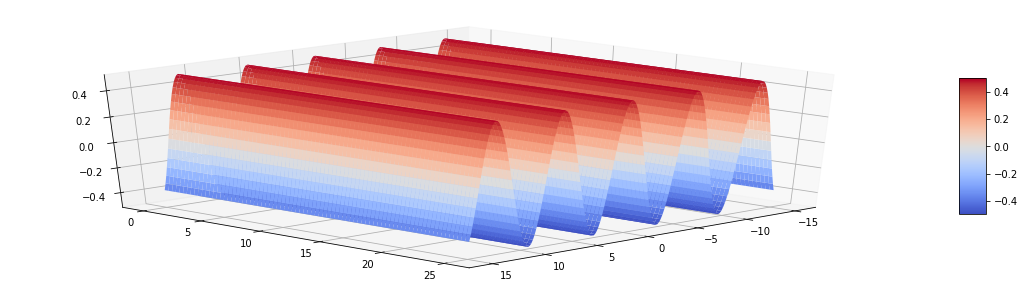

In [229]:
plotfig(Xgrid,T,np.real(f1))

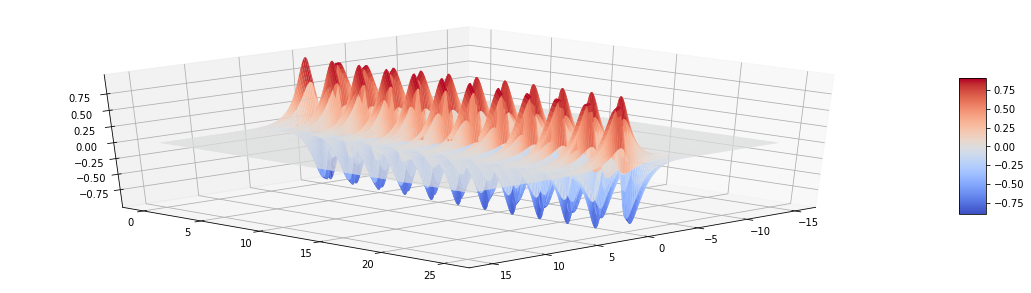

In [230]:
plotfig(Xgrid,T,np.real(f2))

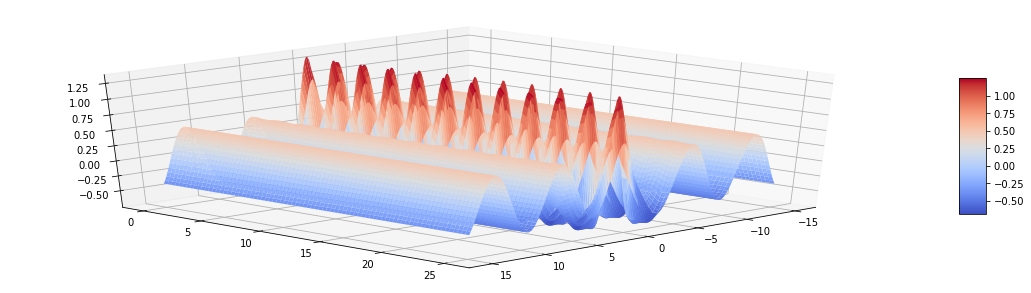

In [231]:
plotfig(Xgrid,T,np.real(X.T))

In [232]:
X1 = X[:,0:-1]
X2 = X[:,1:]

In [233]:
print(X1.shape)
print(X2.shape)

(200, 79)
(200, 79)


In [234]:
r = 50
U,S,V = np.linalg.svd(X1,full_matrices=False,compute_uv=True)
S=np.diag(S)
V=V.T
U=U[:,:r]
S=S[:r,:r]
V=V[:,:r]
Atilde = U.T.conj().dot(X2).dot(V).dot(np.linalg.inv(S))
eigs, W = np.linalg.eig(Atilde)
eigs=np.diag(eigs)
Phi = X2.dot(V).dot(np.linalg.inv(S)).dot(W)    

In [235]:
lambdaa = np.diag(eigs)
omega = np.log(lambdaa)/dt

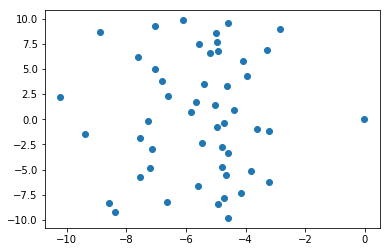

In [236]:
plt.scatter(np.real(omega),np.imag(omega))

In [145]:
bg = np.argwhere(np.abs(omega)<0.1)
omega_bg = omega[bg]
omega_fg = np.delete(omega,bg)

In [159]:
Phi_bg = Phi[:,bg] 

In [237]:
omega

array([ -0.02497984+0.06525951j,  -2.85024043+8.93155828j,
        -3.22796781-1.20908192j,  -3.22737207-6.25163636j,
        -3.26492239+6.8802109j ,  -3.62957312-0.98708719j,
        -3.80999629-5.13550435j,  -3.94762302+4.31638662j,
        -4.07059737+5.74667202j,  -4.14656748-7.27649887j,
        -4.40220723+0.8997316j ,  -4.6116751 +3.31712936j,
        -4.60340914-3.37352089j,  -4.6654651 -5.51093993j,
        -4.77450201-4.72791442j,  -4.78386654-2.72343111j,
        -4.72033642-0.40166267j,  -4.5930339 -9.78084213j,
        -4.59439396+9.55262958j,  -4.73609828-7.85648648j,
        -4.90912841-8.40168852j,  -4.97427757-0.78531979j,
        -5.0143262 +1.44176809j,  -4.99373855+8.55399209j,
        -4.9447819 +7.64835771j,  -4.94051169+6.77131672j,
        -5.19936348+6.53740082j,  -5.39574527+3.52261729j,
        -5.47521342-2.39086503j,  -5.67128706+1.7364864j ,
        -5.84134703+0.70138665j,  -5.60345559-6.65424951j,
        -5.57245424+7.47811027j,  -6.61885947+2.27300193